In [4]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
conv_base.summary()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [6]:
conv_base.trainable = True
set_trainable = False
for layers in conv_base.layers:
    if layers.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layers.trainable = True
    else:
        layers.trainable = False

In [7]:
import os
base_dir = '/Users/l/Documents/MachineLearning/keras-playground/Substations'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import callbacks

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=(0.2),
    zoom_range=(0.2),
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=30, 
    validation_data=validation_generator,
    validation_steps=10,
)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/30
30/30 [==============================] - 168s 6s/step - loss: 0.3780 - acc: 0.8600 - val_loss: 0.2089 - val_acc: 0.9400
Epoch 2/30
30/30 [==============================] - 157s 5s/step - loss: 0.1960 - acc: 0.9350 - val_loss: 0.1765 - val_acc: 0.9400
Epoch 3/30
30/30 [==============================] - 158s 5s/step - loss: 0.1503 - acc: 0.9517 - val_loss: 0.1631 - val_acc: 0.9450
Epoch 4/30
30/30 [==============================] - 157s 5s/step - loss: 0.1290 - acc: 0.9617 - val_loss: 0.1590 - val_acc: 0.9450
Epoch 5/30
30/30 [==============================] - 186s 6s/step - loss: 0.1202 - acc: 0.9550 - val_loss: 0.1606 - val_acc: 0.9350
Epoch 6/30
30/30 [==============================] - 160s 5s/step - loss: 0.0962 - acc: 0.9650 - val_loss: 0.1557 - val_acc: 0.9450
Epoch 7/30
30/30 [==============================] - 157s 5s/step - loss: 0.1027 - acc: 0.9633 - val_loss: 0.1529 - val_acc: 0.9500
E

In [9]:
model.save('Vgg_version3(no dropout 扩大训练集到600).h5')

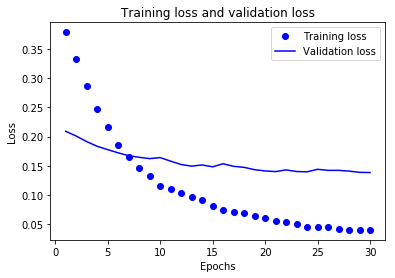

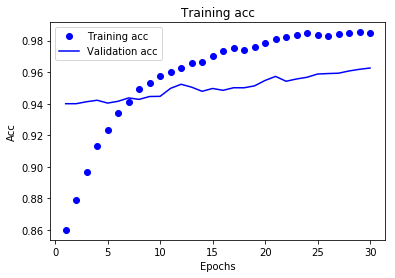

In [10]:
history_dict = model.history.history
history_dict.keys()

import matplotlib.pyplot as plt

def smooth_curve(points, factor=0.75):
    smoothed_points = []
    for point in points:
        if not smoothed_points:
            smoothed_points.append(point)
        else:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + (1-factor)*point)
    return smoothed_points

train_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

epochs = range(1, len(train_loss) +1)

plt.plot(epochs, smooth_curve(train_loss), 'bo', label="Training loss")
plt.plot(epochs,smooth_curve(validation_loss), 'b', label="Validation loss")
plt.title('Training loss and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


train_acc= history_dict['acc']
validation_acc= history_dict['val_acc']
epochs = range(1, len(train_acc) +1)

plt.plot(epochs, smooth_curve(train_acc), 'bo', label="Training acc")
plt.plot(epochs, smooth_curve(validation_acc), 'b', label="Validation acc")
plt.title('Training acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [13]:
img_path = "/Users/l/Desktop/实验室/云南电网-gis坐标-图像/学习/zoom17/1095-35kV夹寒箐变电站-104.3990972-22.8900833.jpg"

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

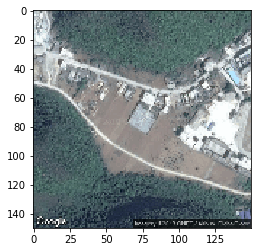

[[0.99235207]]
变电站


In [14]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()
prediction = model.predict(img_tensor)
print(prediction)
if prediction < 0.5 : 
    print('others')
else:
    print('变电站')